# Evaluation of Traffic Accident Hotspot Detection Methods

Luke Zaruba, Bryan Runck

In [45]:
# Imports
import warnings

import contextily as ctx
import geopandas as gpd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

## Data

In [25]:
# Loading data
grid_5000 = gpd.read_file("../../data/other/grid_5000_results.geojson")
grid_10000 = gpd.read_file("../../data/other/grid_10000_results.geojson")
grid_25000 = gpd.read_file("../../data/other/grid_25000_results.geojson")

COLUMNS = ['LISA_DENSITY', 'LISA_INTENSITY', 'LISA_RATE_FUZZY', 'LISA_DENSITY_FUZZY', 'LISA_INTENSITY_FUZZY', 'LISA_RATE_KNN',
    'LISA_DENSITY_KNN', 'LISA_INTENSITY_KNN', 'ADBSCAN_MEAN_ALL', 'ADBSCAN_MEAN_HH', 'ADBSCAN_MEAN_HHHL', 'ADBSCAN_MED_ALL',
    'ADBSCAN_MED_HH', 'ADBSCAN_MED_HHHL'
]

## Jaccard Index

In [9]:
def pairwise_jaccard(df, columns):
    # Storing data
    history = []
    values = []
    
    # Loop through columns
    for col1 in columns:
        for col2 in columns:
            if col1 == col2 or (col1, col2) in history or (col2, col1) in history:
                continue
            else:
                # Calculate Num/Denom
                numerator = len(df.loc[(df[col1] == 1) & (df[col2] == 1)])
                denominator = (len(df) * 2) - numerator
                jaccard = round(numerator / denominator, 4)
                
                history.append((col1, col2))
                values.append((col1, col2, jaccard))
                
                print(f"{col1} & {col2} = {jaccard}")
                
    return values

### Grid: 5000

In [10]:
jaccard_5000 = pairwise_jaccard(grid_5000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.0109
LISA_DENSITY & LISA_RATE_FUZZY = 0.0089
LISA_DENSITY & LISA_DENSITY_FUZZY = 0.0136
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.0106
LISA_DENSITY & LISA_RATE_KNN = 0.0086
LISA_DENSITY & LISA_DENSITY_KNN = 0.0111
LISA_DENSITY & LISA_INTENSITY_KNN = 0.0065
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.017
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.005
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.0029
LISA_DENSITY & ADBSCAN_MED_ALL = 0.0187
LISA_DENSITY & ADBSCAN_MED_HH = 0.0041
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.0034
LISA_INTENSITY & LISA_RATE_FUZZY = 0.003
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.0072
LISA_INTENSITY & LISA_INTENSITY_FUZZY = 0.0029
LISA_INTENSITY & LISA_RATE_KNN = 0.0033
LISA_INTENSITY & LISA_DENSITY_KNN = 0.0064
LISA_INTENSITY & LISA_INTENSITY_KNN = 0.0025
LISA_INTENSITY & ADBSCAN_MEAN_ALL = 0.0084
LISA_INTENSITY & ADBSCAN_MEAN_HH = 0.0021
LISA_INTENSITY & ADBSCAN_MEAN_HHHL = 0.0011
LISA_INTENSITY & ADBSCAN_MED_ALL = 0.0091
LISA_INTENSITY & ADBSCAN_MED_HH = 0.00

### Grid: 10000

In [11]:
jaccard_10000 = pairwise_jaccard(grid_10000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.0204
LISA_DENSITY & LISA_RATE_FUZZY = 0.0244
LISA_DENSITY & LISA_DENSITY_FUZZY = 0.0321
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.028
LISA_DENSITY & LISA_RATE_KNN = 0.0232
LISA_DENSITY & LISA_DENSITY_KNN = 0.0296
LISA_DENSITY & LISA_INTENSITY_KNN = 0.0178
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.0269
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.0078
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.0046
LISA_DENSITY & ADBSCAN_MED_ALL = 0.0264
LISA_DENSITY & ADBSCAN_MED_HH = 0.006
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.0051
LISA_INTENSITY & LISA_RATE_FUZZY = 0.0123
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.0202
LISA_INTENSITY & LISA_INTENSITY_FUZZY = 0.0118
LISA_INTENSITY & LISA_RATE_KNN = 0.0133
LISA_INTENSITY & LISA_DENSITY_KNN = 0.018
LISA_INTENSITY & LISA_INTENSITY_KNN = 0.009
LISA_INTENSITY & ADBSCAN_MEAN_ALL = 0.0169
LISA_INTENSITY & ADBSCAN_MEAN_HH = 0.0054
LISA_INTENSITY & ADBSCAN_MEAN_HHHL = 0.0032
LISA_INTENSITY & ADBSCAN_MED_ALL = 0.0169
LISA_INTENSITY & ADBSCAN_MED_HH = 0.004

### Grid: 25000

In [12]:
jaccard_25000 = pairwise_jaccard(grid_25000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.0556
LISA_DENSITY & LISA_RATE_FUZZY = 0.0974
LISA_DENSITY & LISA_DENSITY_FUZZY = 0.0972
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.1013
LISA_DENSITY & LISA_RATE_KNN = 0.0919
LISA_DENSITY & LISA_DENSITY_KNN = 0.0939
LISA_DENSITY & LISA_INTENSITY_KNN = 0.0825
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.0587
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.0227
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.0142
LISA_DENSITY & ADBSCAN_MED_ALL = 0.059
LISA_DENSITY & ADBSCAN_MED_HH = 0.0162
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.0142
LISA_INTENSITY & LISA_RATE_FUZZY = 0.075
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.069
LISA_INTENSITY & LISA_INTENSITY_FUZZY = 0.0756
LISA_INTENSITY & LISA_RATE_KNN = 0.0726
LISA_INTENSITY & LISA_DENSITY_KNN = 0.068
LISA_INTENSITY & LISA_INTENSITY_KNN = 0.0603
LISA_INTENSITY & ADBSCAN_MEAN_ALL = 0.0471
LISA_INTENSITY & ADBSCAN_MEAN_HH = 0.0149
LISA_INTENSITY & ADBSCAN_MEAN_HHHL = 0.0105
LISA_INTENSITY & ADBSCAN_MED_ALL = 0.0419
LISA_INTENSITY & ADBSCAN_MED_HH = 0.012

## Inter-Rater Reliability

In [21]:
def cohen_kappa(df, columns):
    # Storing data
    history = []
    values = []
    
    # Loop through columns
    for col1 in columns:
        for col2 in columns:
            if col1 == col2 or (col1, col2) in history or (col2, col1) in history:
                continue
            else:
                # Calculate Kappa
                tp = len(df.loc[(df[col1] == 1) & (df[col2] == 1)])
                fp = len(df.loc[(df[col1] == 0) & (df[col2] == 1)])
                tn = len(df.loc[(df[col1] == 0) & (df[col2] == 0)])
                fn = len(df.loc[(df[col1] == 1) & (df[col2] == 0)])
                N = len(df)
                
                p1 = ((tp + fn) * (tp + fp)) / (N**2)
                p2 = ((tn + fn) * (tn + fp)) / (N**2)
                
                pe = p1 + p2
                po = (tp + tn) / N
                
                kappa = (po - pe) / (1 - pe)
                
                history.append((col1, col2))
                values.append((col1, col2, kappa))
                
                print(f"{col1} & {col2} = {kappa}")
                
    return values

#### Grid: 5000

In [22]:
cohen_5000 = cohen_kappa(grid_5000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.2654121850900947
LISA_DENSITY & LISA_RATE_FUZZY = 0.09544587034509597
LISA_DENSITY & LISA_DENSITY_FUZZY = 0.2998061285413935
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.08670925460860289
LISA_DENSITY & LISA_RATE_KNN = 0.10760340701521812
LISA_DENSITY & LISA_DENSITY_KNN = 0.2718573942003843
LISA_DENSITY & LISA_INTENSITY_KNN = 0.08210699955597545
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.42528668460408814
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.20899066352181644
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.1260176989789631
LISA_DENSITY & ADBSCAN_MED_ALL = 0.47334774515192296
LISA_DENSITY & ADBSCAN_MED_HH = 0.17315373197207012
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.14660574091046266
LISA_INTENSITY & LISA_RATE_FUZZY = -0.01214988216332438
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.15869532297357278
LISA_INTENSITY & LISA_INTENSITY_FUZZY = -0.03514704315899361
LISA_INTENSITY & LISA_RATE_KNN = 0.0033970364921318457
LISA_INTENSITY & LISA_DENSITY_KNN = 0.1655165696422764
LISA_INTENSITY & L

#### Grid: 10000

In [23]:
cohen_10000 = cohen_kappa(grid_10000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.3485005976629257
LISA_DENSITY & LISA_RATE_FUZZY = 0.12503573223883038
LISA_DENSITY & LISA_DENSITY_FUZZY = 0.376747551139325
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.105049794880206
LISA_DENSITY & LISA_RATE_KNN = 0.13789096199454318
LISA_DENSITY & LISA_DENSITY_KNN = 0.3861172463328184
LISA_DENSITY & LISA_INTENSITY_KNN = 0.11192597015362982
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.44938895102576054
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.22723637059953533
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.1430061515674578
LISA_DENSITY & ADBSCAN_MED_ALL = 0.46906966115029286
LISA_DENSITY & ADBSCAN_MED_HH = 0.17671291451917348
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.15187226745203533
LISA_INTENSITY & LISA_RATE_FUZZY = 0.004386374517367778
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.21838465405906912
LISA_INTENSITY & LISA_INTENSITY_FUZZY = -0.03552693056512812
LISA_INTENSITY & LISA_RATE_KNN = 0.03429193251257053
LISA_INTENSITY & LISA_DENSITY_KNN = 0.2170458504973854
LISA_INTENSITY & LISA_I

#### Grid: 25000

In [24]:
cohen_25000 = cohen_kappa(grid_25000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.38925326983373953
LISA_DENSITY & LISA_RATE_FUZZY = 0.13208144430141566
LISA_DENSITY & LISA_DENSITY_FUZZY = 0.34639979846441044
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.09284852393278505
LISA_DENSITY & LISA_RATE_KNN = 0.15750160449560316
LISA_DENSITY & LISA_DENSITY_KNN = 0.36006606383535594
LISA_DENSITY & LISA_INTENSITY_KNN = 0.14176287821714031
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.4380252250879642
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.288952647793748
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.18908724468800173
LISA_DENSITY & ADBSCAN_MED_ALL = 0.4768245124055059
LISA_DENSITY & ADBSCAN_MED_HH = 0.2141819789101472
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.18908724468800173
LISA_INTENSITY & LISA_RATE_FUZZY = 0.04963856908317541
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.18405378062827718
LISA_INTENSITY & LISA_INTENSITY_FUZZY = 0.004175987138035947
LISA_INTENSITY & LISA_RATE_KNN = 0.0828855506731756
LISA_INTENSITY & LISA_DENSITY_KNN = 0.20619027406738047
LISA_INTENSITY & LISA_

## Accuracy

In [26]:
def pairwise_pseudo_accuracy(df, columns):
    # Storing data
    history = []
    values = []
    
    # Loop through columns
    for col1 in columns:
        for col2 in columns:
            if col1 == col2 or (col1, col2) in history or (col2, col1) in history:
                continue
            else:
                # Calculate "Accuracy"
                tp = len(df.loc[(df[col1] == 1) & (df[col2] == 1)])
                tn = len(df.loc[(df[col1] == 0) & (df[col2] == 0)])
                N = len(df)
                
                accuracy = (tp + tn) / N
                
                history.append((col1, col2))
                values.append((col1, col2, accuracy))
                
                print(f"{col1} & {col2} = {accuracy}")
                
    return values

### Grid: 5000

In [27]:
accuracy_5000 = pairwise_pseudo_accuracy(grid_5000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.9064539175994284
LISA_DENSITY & LISA_RATE_FUZZY = 0.8397237437485116
LISA_DENSITY & LISA_DENSITY_FUZZY = 0.901833769945225
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.8092879256965945
LISA_DENSITY & LISA_RATE_KNN = 0.8511550369135509
LISA_DENSITY & LISA_DENSITY_KNN = 0.9072160038104311
LISA_DENSITY & LISA_INTENSITY_KNN = 0.8612526792093356
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.923362705406049
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.9313646106215766
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.9277923315075017
LISA_DENSITY & ADBSCAN_MED_ALL = 0.9297928078113836
LISA_DENSITY & ADBSCAN_MED_HH = 0.9292212431531317
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.9282210050011908
LISA_INTENSITY & LISA_RATE_FUZZY = 0.8341986187187426
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.8945939509407002
LISA_INTENSITY & LISA_INTENSITY_FUZZY = 0.7963324601095499
LISA_INTENSITY & LISA_RATE_KNN = 0.8475351274112884
LISA_INTENSITY & LISA_DENSITY_KNN = 0.9065491783758037
LISA_INTENSITY & LISA_INTENSITY_KNN =

### Grid: 10000

In [28]:
accuracy_10000 = pairwise_pseudo_accuracy(grid_10000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.8853701588620081
LISA_DENSITY & LISA_RATE_FUZZY = 0.7250545114733673
LISA_DENSITY & LISA_DENSITY_FUZZY = 0.85235178070813
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.6707507008618004
LISA_DENSITY & LISA_RATE_KNN = 0.7469629321981103
LISA_DENSITY & LISA_DENSITY_KNN = 0.8654345343162704
LISA_DENSITY & LISA_INTENSITY_KNN = 0.7701173294569619
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.8979337555809366
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.9075900737202782
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.9025023362060014
LISA_DENSITY & ADBSCAN_MED_ALL = 0.9054096147855882
LISA_DENSITY & ADBSCAN_MED_HH = 0.9034368186065829
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.9021908420724744
LISA_INTENSITY & LISA_RATE_FUZZY = 0.6947357491433911
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.8232789949122625
LISA_INTENSITY & LISA_INTENSITY_FUZZY = 0.624649569099782
LISA_INTENSITY & LISA_RATE_KNN = 0.7247430173398401
LISA_INTENSITY & LISA_DENSITY_KNN = 0.8374000622988267
LISA_INTENSITY & LISA_INTENSITY_KNN = 

### Grid: 25000

In [29]:
accuracy_25000 = pairwise_pseudo_accuracy(grid_25000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.8009240658899156
LISA_DENSITY & LISA_RATE_FUZZY = 0.49457613499397346
LISA_DENSITY & LISA_DENSITY_FUZZY = 0.6936520691040579
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.43370831659300924
LISA_DENSITY & LISA_RATE_KNN = 0.5399758939333066
LISA_DENSITY & LISA_DENSITY_KNN = 0.7099236641221374
LISA_DENSITY & LISA_INTENSITY_KNN = 0.5534351145038168
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.819003615910004
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.8286460425873845
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.8121735636801929
LISA_DENSITY & ADBSCAN_MED_ALL = 0.8362796303736441
LISA_DENSITY & ADBSCAN_MED_HH = 0.8161912414624347
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.8121735636801929
LISA_INTENSITY & LISA_RATE_FUZZY = 0.44053836882282044
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.6195259140216954
LISA_INTENSITY & LISA_INTENSITY_FUZZY = 0.36882282040980313
LISA_INTENSITY & LISA_RATE_KNN = 0.4959823222177581
LISA_INTENSITY & LISA_DENSITY_KNN = 0.6430293290478104
LISA_INTENSITY & LISA_INTENSITY_

## R-Squared

### Grid: 5000

In [35]:
# Correlation Matrix
corr_5000 = grid_5000[COLUMNS].corr()

corr_5000.style.background_gradient(cmap="coolwarm")

,LISA_DENSITY,LISA_INTENSITY,LISA_RATE_FUZZY,LISA_DENSITY_FUZZY,LISA_INTENSITY_FUZZY,LISA_RATE_KNN,LISA_DENSITY_KNN,LISA_INTENSITY_KNN,ADBSCAN_MEAN_ALL,ADBSCAN_MEAN_HH,ADBSCAN_MEAN_HHHL,ADBSCAN_MED_ALL,ADBSCAN_MED_HH,ADBSCAN_MED_HHHL
LISA_DENSITY,1.000000,0.267963,0.098162,0.299848,0.093628,0.109280,0.274438,0.082310,0.426594,0.318594,0.240758,0.474817,0.277376,0.253632
LISA_INTENSITY,0.267963,1.000000,-0.013021,0.159875,-0.040306,0.003567,0.165517,-0.003890,0.216327,0.136963,0.093685,0.238262,0.149354,0.151352
LISA_RATE_FUZZY,0.098162,-0.013021,1.000000,0.157208,0.685218,0.550058,0.173049,0.470318,0.067685,0.065388,0.062790,0.057130,0.064403,0.050383
LISA_DENSITY_FUZZY,0.299848,0.159875,0.157208,1.000000,0.108266,0.180957,0.658688,0.124037,0.320204,0.232423,0.162243,0.295647,0.199050,0.182540
LISA_INTENSITY_FUZZY,0.093628,-0.040306,0.685218,0.108266,1.000000,0.440443,0.138202,0.458107,0.044353,0.017591,0.010274,0.038653,0.015484,0.015239
LISA_RATE_KNN,0.109280,0.003567,0.550058,0.180957,0.440443,1.000000,0.190270,0.794508,0.054987,0.064210,0.069125,0.051348,0.039192,0.029383
LISA_DENSITY_KNN,0.274438,0.165517,0.173049,0.658688,0.138202,0.190270,1.000000,0.131899,0.257219,0.180173,0.118393,0.244434,0.145186,0.129132
LISA_INTENSITY_KNN,0.082310,-0.003890,0.470318,0.124037,0.458107,0.794508,0.131899,1.000000,0.038836,0.028075,0.016238,0.049046,0.005602,0.008453
ADBSCAN_MEAN_ALL,0.426594,0.216327,0.067685,0.320204,0.044353,0.054987,0.257219,0.038836,1.000000,0.404304,0.305656,0.802603,0.379042,0.344245
ADBSCAN_MEAN_HH,0.318594,0.136963,0.065388,0.232423,0.017591,0.064210,0.180173,0.028075,0.404304,1.000000,0.756005,0.404459,0.790574,0.753566


### Grid: 10000

In [36]:
# Correlation Matrix
corr_10000 = grid_10000[COLUMNS].corr()

corr_10000.style.background_gradient(cmap="coolwarm")

,LISA_DENSITY,LISA_INTENSITY,LISA_RATE_FUZZY,LISA_DENSITY_FUZZY,LISA_INTENSITY_FUZZY,LISA_RATE_KNN,LISA_DENSITY_KNN,LISA_INTENSITY_KNN,ADBSCAN_MEAN_ALL,ADBSCAN_MEAN_HH,ADBSCAN_MEAN_HHHL,ADBSCAN_MED_ALL,ADBSCAN_MED_HH,ADBSCAN_MED_HHHL
LISA_DENSITY,1.000000,0.349987,0.144984,0.389919,0.133519,0.154623,0.392255,0.119171,0.449508,0.333965,0.259958,0.470401,0.277985,0.256999
LISA_INTENSITY,0.349987,1.000000,0.005346,0.232369,-0.047924,0.040226,0.225028,0.004453,0.282382,0.240946,0.185796,0.304459,0.228441,0.237268
LISA_RATE_FUZZY,0.144984,0.005346,1.000000,0.201320,0.695286,0.575624,0.231758,0.482268,0.089783,0.100413,0.090765,0.068651,0.106491,0.091785
LISA_DENSITY_FUZZY,0.389919,0.232369,0.201320,1.000000,0.121592,0.201984,0.702923,0.147351,0.405245,0.276407,0.197468,0.353006,0.231976,0.221128
LISA_INTENSITY_FUZZY,0.133519,-0.047924,0.695286,0.121592,1.000000,0.443704,0.154611,0.456361,0.047302,0.022960,0.016032,0.026682,0.023807,0.016076
LISA_RATE_KNN,0.154623,0.040226,0.575624,0.201984,0.443704,1.000000,0.236802,0.761173,0.076485,0.068112,0.069219,0.051946,0.055598,0.033846
LISA_DENSITY_KNN,0.392255,0.225028,0.231758,0.702923,0.154611,0.236802,1.000000,0.164520,0.354294,0.261648,0.198638,0.304844,0.246644,0.215097
LISA_INTENSITY_KNN,0.119171,0.004453,0.482268,0.147351,0.456361,0.761173,0.164520,1.000000,0.069143,0.014994,0.003525,0.066777,0.038940,0.022886
ADBSCAN_MEAN_ALL,0.449508,0.282382,0.089783,0.405245,0.047302,0.076485,0.354294,0.069143,1.000000,0.401789,0.306740,0.807335,0.367090,0.334683
ADBSCAN_MEAN_HH,0.333965,0.240946,0.100413,0.276407,0.022960,0.068112,0.261648,0.014994,0.401789,1.000000,0.763436,0.423384,0.752138,0.748170


### Grid: 25000

In [37]:
# Correlation Matrix
corr_25000 = grid_25000[COLUMNS].corr()

corr_25000.style.background_gradient(cmap="coolwarm")

,LISA_DENSITY,LISA_INTENSITY,LISA_RATE_FUZZY,LISA_DENSITY_FUZZY,LISA_INTENSITY_FUZZY,LISA_RATE_KNN,LISA_DENSITY_KNN,LISA_INTENSITY_KNN,ADBSCAN_MEAN_ALL,ADBSCAN_MEAN_HH,ADBSCAN_MEAN_HHHL,ADBSCAN_MED_ALL,ADBSCAN_MED_HH,ADBSCAN_MED_HHHL
LISA_DENSITY,1.000000,0.390135,0.195365,0.397124,0.156668,0.211867,0.402255,0.179784,0.439778,0.410944,0.323134,0.481787,0.346316,0.323134
LISA_INTENSITY,0.390135,1.000000,0.077230,0.218430,0.007444,0.116769,0.237785,0.049922,0.348639,0.254507,0.234583,0.317249,0.266381,0.234583
LISA_RATE_FUZZY,0.195365,0.077230,1.000000,0.255667,0.702330,0.628820,0.301067,0.557380,0.031926,0.119203,0.125782,0.022572,0.087062,0.074825
LISA_DENSITY_FUZZY,0.397124,0.218430,0.255667,1.000000,0.183717,0.294263,0.779010,0.227188,0.424765,0.209331,0.150036,0.374024,0.166092,0.150036
LISA_INTENSITY_FUZZY,0.156668,0.007444,0.702330,0.183717,1.000000,0.477956,0.206860,0.462718,-0.036637,0.009104,0.003037,-0.042119,-0.033663,-0.051191
LISA_RATE_KNN,0.211867,0.116769,0.628820,0.294263,0.477956,1.000000,0.352993,0.785830,0.096196,0.103990,0.094517,0.079603,0.061654,0.045093
LISA_DENSITY_KNN,0.402255,0.237785,0.301067,0.779010,0.206860,0.352993,1.000000,0.296972,0.390657,0.254418,0.200054,0.354239,0.214406,0.200054
LISA_INTENSITY_KNN,0.179784,0.049922,0.557380,0.227188,0.462718,0.785830,0.296972,1.000000,0.086989,0.122416,0.108870,0.086741,0.077459,0.059972
ADBSCAN_MEAN_ALL,0.439778,0.348639,0.031926,0.424765,-0.036637,0.096196,0.390657,0.086989,1.000000,0.449388,0.353363,0.875599,0.378714,0.353363
ADBSCAN_MEAN_HH,0.410944,0.254507,0.119203,0.209331,0.009104,0.103990,0.254418,0.122416,0.449388,1.000000,0.786321,0.474659,0.842734,0.786321


## Mapping Agreement

### Grid: 5000

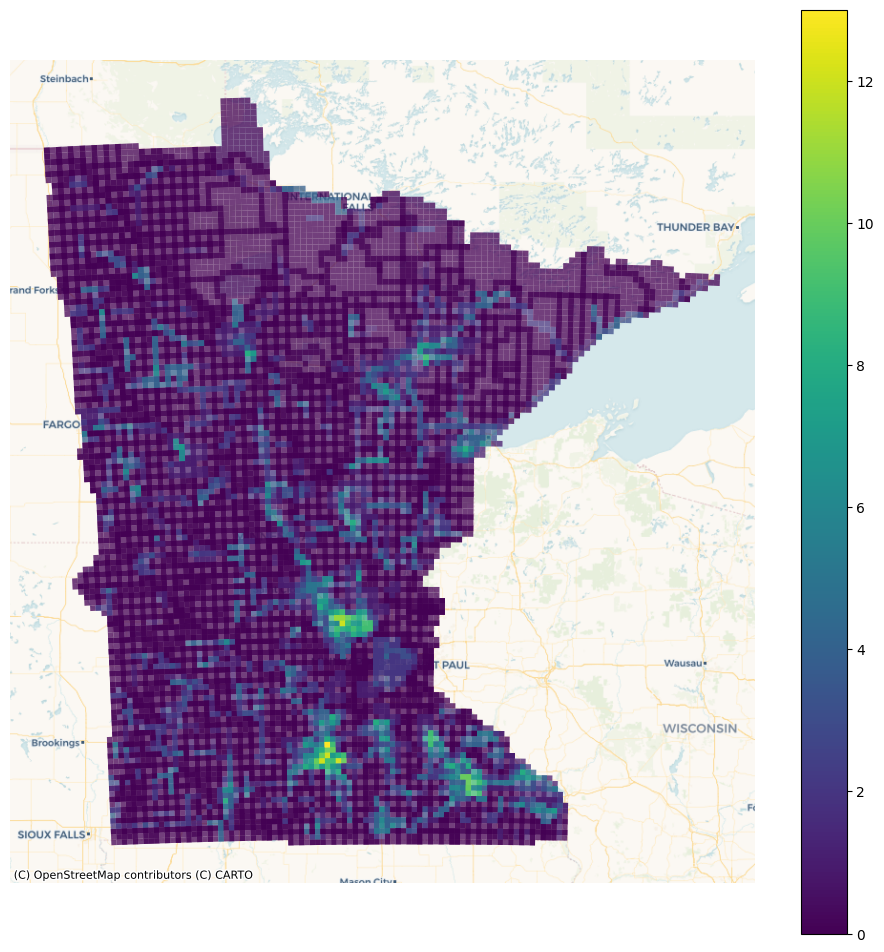

In [105]:
# Agreement
grid_5000["Agreement"] = grid_5000["LISA_DENSITY"] + grid_5000["LISA_INTENSITY"] + grid_5000["LISA_RATE_FUZZY"] +\
    grid_5000["LISA_DENSITY_FUZZY"] + grid_5000["LISA_INTENSITY_FUZZY"] + grid_5000["LISA_RATE_KNN"] + grid_5000["LISA_DENSITY_KNN"] +\
    grid_5000["LISA_INTENSITY_KNN"] + grid_5000["ADBSCAN_MEAN_ALL"] + grid_5000["ADBSCAN_MEAN_HH"] + grid_5000["ADBSCAN_MEAN_HHHL"] +\
    grid_5000["ADBSCAN_MED_ALL"] + grid_5000["ADBSCAN_MED_HH"] + grid_5000["ADBSCAN_MED_HHHL"]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

grid_5000.to_crs(epsg=3857).plot(
    ax=ax,
    alpha=0.75,
    column="Agreement",
    legend=True
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

ax.axis("off")
plt.show()

### Grid: 10000

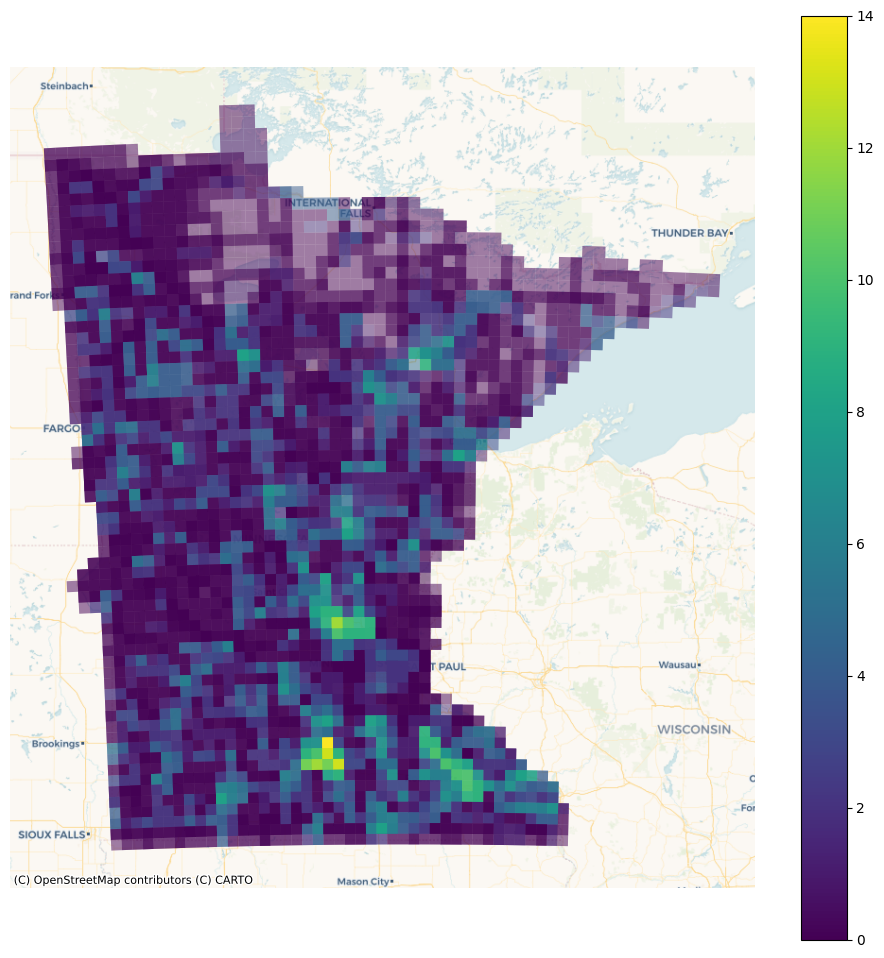

In [104]:
# Agreement
grid_10000["Agreement"] = grid_10000["LISA_DENSITY"] + grid_10000["LISA_INTENSITY"] + grid_10000["LISA_RATE_FUZZY"] +\
    grid_10000["LISA_DENSITY_FUZZY"] + grid_10000["LISA_INTENSITY_FUZZY"] + grid_10000["LISA_RATE_KNN"] + grid_10000["LISA_DENSITY_KNN"] +\
    grid_10000["LISA_INTENSITY_KNN"] + grid_10000["ADBSCAN_MEAN_ALL"] + grid_10000["ADBSCAN_MEAN_HH"] + grid_10000["ADBSCAN_MEAN_HHHL"] +\
    grid_10000["ADBSCAN_MED_ALL"] + grid_10000["ADBSCAN_MED_HH"] + grid_10000["ADBSCAN_MED_HHHL"]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

grid_10000.to_crs(epsg=3857).plot(
    ax=ax,
    alpha=0.5,
    column="Agreement",
    legend=True
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

ax.axis("off")
plt.show()

### Grid: 25000

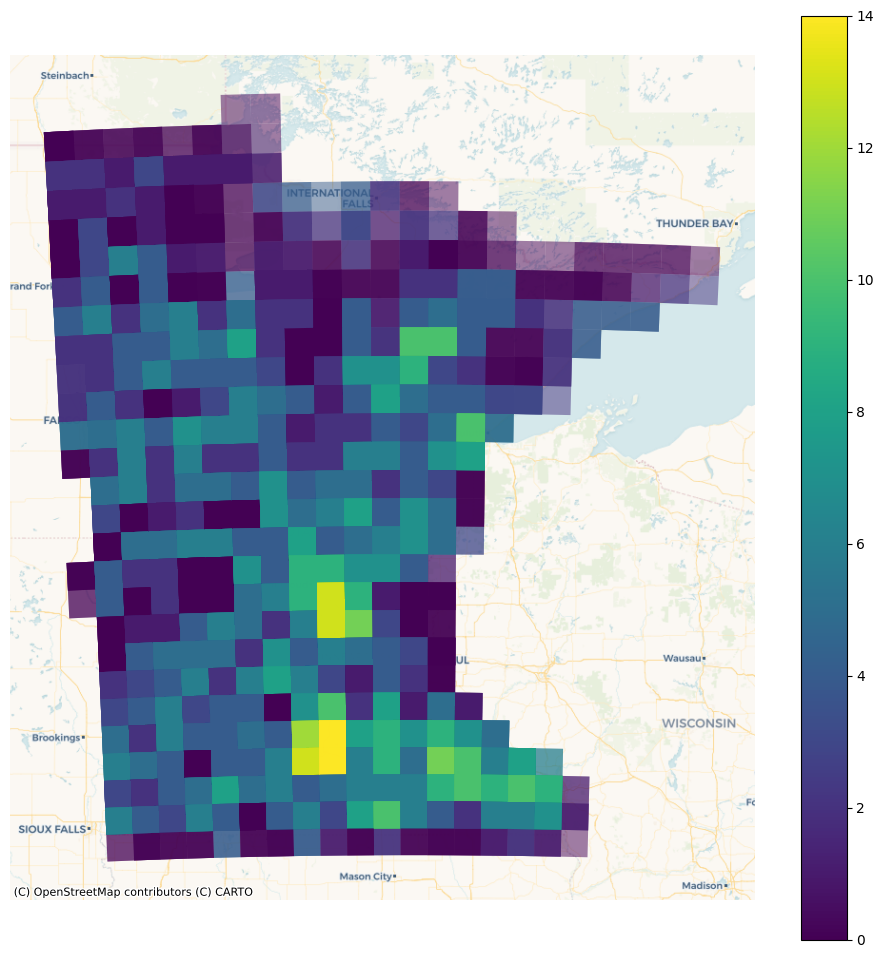

In [103]:
# Agreement
grid_25000["Agreement"] = grid_25000["LISA_DENSITY"] + grid_25000["LISA_INTENSITY"] + grid_25000["LISA_RATE_FUZZY"] +\
    grid_25000["LISA_DENSITY_FUZZY"] + grid_25000["LISA_INTENSITY_FUZZY"] + grid_25000["LISA_RATE_KNN"] + grid_25000["LISA_DENSITY_KNN"] +\
    grid_25000["LISA_INTENSITY_KNN"] + grid_25000["ADBSCAN_MEAN_ALL"] + grid_25000["ADBSCAN_MEAN_HH"] + grid_25000["ADBSCAN_MEAN_HHHL"] +\
    grid_25000["ADBSCAN_MED_ALL"] + grid_25000["ADBSCAN_MED_HH"] + grid_25000["ADBSCAN_MED_HHHL"]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

grid_25000.to_crs(epsg=3857).plot(
    ax=ax,
    alpha=0.5,
    column="Agreement",
    legend=True
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

ax.axis("off")
plt.show()

## Aggregation

In [46]:
def aggregate(values, columns):
    # Storing metrics
    metrics = {}
    
    for col in columns:
        # Storing values for each col
        col_values = []
        
        for row in values:
            if col in row:
                col_values.append(row[2])
        
        metrics[col] = {"mean": np.mean(col_values), "stdev": np.std(col_values), "median": np.median(col_values)}
        
    return metrics

def aggregate_r2(df):
    # Storing metrics
    metrics = {}
    
    for col1 in list(df.columns):
        # Storing values for each col
        col_values = []
        
        for col2 in list(df.columns):
            if col1 == col2:
                continue
            else:
                col_values.append(df[col1][col2])
        
        metrics[col1] = {"mean": np.mean(col_values), "stdev": np.std(col_values), "median": np.median(col_values)}
        
    return metrics

### Grid: 5000

In [47]:
# Jaccard
jaccard_5000_metrics = aggregate(jaccard_5000, COLUMNS)

# IRR
irr_5000_metrics = aggregate(cohen_5000, COLUMNS)

# Accuracy
acc_5000_metrics = aggregate(accuracy_5000, COLUMNS)

# R2
r2_5000_metrics = aggregate_r2(corr_5000)

### Grid: 10000

In [48]:
# Jaccard
jaccard_10000_metrics = aggregate(jaccard_10000, COLUMNS)

# IRR
irr_10000_metrics = aggregate(cohen_10000, COLUMNS)

# Accuracy
acc_10000_metrics = aggregate(accuracy_10000, COLUMNS)

# R2
r2_10000_metrics = aggregate_r2(corr_10000)

### Grid: 25000

In [49]:
# Jaccard
jaccard_25000_metrics = aggregate(jaccard_25000, COLUMNS)

# IRR
irr_25000_metrics = aggregate(cohen_25000, COLUMNS)

# Accuracy
acc_25000_metrics = aggregate(accuracy_25000, COLUMNS)

# R2
r2_25000_metrics = aggregate_r2(corr_25000)

### All Grids

In [53]:
# Jaccard
jaccard_all = aggregate(jaccard_5000 + jaccard_10000 + jaccard_25000, COLUMNS)

# IRR
irr_all = aggregate(cohen_5000 + cohen_10000 + cohen_25000, COLUMNS)

# Accuracy
acc_all = aggregate(accuracy_5000 + accuracy_10000 + accuracy_25000, COLUMNS)

### Table Creation

#### By Grid

In [71]:
# Function to add data to final DF
def format_df(data, grid_name, metric_name):
    # Convert to DF & transpose
    stats_df = pd.DataFrame(data).T
    
    # Create index
    multi_index = pd.MultiIndex.from_product([[grid_name], [metric_name], stats_df.columns], names=["Grid Size", "Metric", "Stat"])
    
    stats_df.columns = multi_index
    
    # Append
    return stats_df

In [72]:
# 5000 meters
j5000 = format_df(jaccard_5000_metrics, "5000 meters", "Jaccard")
i5000 = format_df(irr_5000_metrics, "5000 meters", "IRR")
a5000 = format_df(acc_5000_metrics, "5000 meters", "Accuracy")
r5000 = format_df(r2_5000_metrics, "5000 meters", "R2")

# 10000 meters
j10000 = format_df(jaccard_10000_metrics, "10000 meters", "Jaccard")
i10000 = format_df(irr_10000_metrics, "10000 meters", "IRR")
a10000 = format_df(acc_10000_metrics, "10000 meters", "Accuracy")
r10000 = format_df(r2_10000_metrics, "10000 meters", "R2")

# 25000 meters
j25000 = format_df(jaccard_25000_metrics, "25000 meters", "Jaccard")
i25000 = format_df(irr_25000_metrics, "25000 meters", "IRR")
a25000 = format_df(acc_25000_metrics, "25000 meters", "Accuracy")
r25000 = format_df(r2_25000_metrics, "25000 meters", "R2")

In [92]:
# Concat all separate grid metrics to single table
df_grids = pd.concat([j5000, i5000, a5000, r5000, j10000, i10000, a10000, r10000, j25000, i25000, a25000, r25000])

df_grids.groupby(level=0).mean()

Grid Size            5000 meters                                        \
Metric                   Jaccard                         IRR             
Stat                        mean     stdev  median      mean     stdev   
ADBSCAN_MEAN_ALL        0.009108  0.006570  0.0067  0.240853  0.198425   
ADBSCAN_MEAN_HH         0.003223  0.001606  0.0033  0.270269  0.278832   
ADBSCAN_MEAN_HHHL       0.002031  0.001032  0.0020  0.221727  0.273642   
ADBSCAN_MED_ALL         0.009169  0.006708  0.0063  0.242753  0.202065   
ADBSCAN_MED_HH          0.002869  0.001524  0.0030  0.269203  0.308167   
ADBSCAN_MED_HHHL        0.002438  0.001326  0.0025  0.248163  0.298691   
LISA_DENSITY            0.009331  0.004831  0.0089  0.212488  0.123468   
LISA_DENSITY_FUZZY      0.009400  0.005706  0.0111  0.211807  0.148612   
LISA_DENSITY_KNN        0.008108  0.005660  0.0093  0.197561  0.145710   
LISA_INTENSITY          0.004685  0.003136  0.0030  0.103932  0.096209   
LISA_INTENSITY_FUZZY    0.013123  0.015327  0.0072  0.147135  0.212393   
LISA_INTENSITY_KNN      0.010385  0.013023  0.0047  0.164603  0.235176   
LISA_RATE_FUZZY         0.012785  0.015042  0.0067  0.178791  0.219804   
LISA_RATE_KNN           0.012254  0.013800  0.0057  0.188108  0.237739   

Grid Size                                                               ...  \
Metric                          Accuracy                            R2  ...   
Stat                    median      mean     stdev    median      mean  ...   
ADBSCAN_MEAN_ALL      0.215936  0.904626  0.047716  0.912122  0.281697  ...   
ADBSCAN_MEAN_HH       0.154383  0.932347  0.045489  0.937271  0.319410  ...   
ADBSCAN_MEAN_HHHL     0.086131  0.932119  0.044376  0.938271  0.274608  ...   
ADBSCAN_MED_ALL       0.237837  0.904845  0.048210  0.910645  0.283518  ...   
ADBSCAN_MED_HH        0.125878  0.932222  0.045749  0.938366  0.315869  ...   
ADBSCAN_MED_HHHL      0.106951  0.932134  0.045294  0.938604  0.295833  ...   
LISA_DENSITY          0.173154  0.895898  0.039679  0.907216  0.247492  ...   
LISA_DENSITY_FUZZY    0.154383  0.898360  0.037666  0.907454  0.236999  ...   
LISA_DENSITY_KNN      0.161518  0.907205  0.035816  0.910645  0.215892  ...   
LISA_INTENSITY        0.099307  0.893817  0.043770  0.906549  0.117357  ...   
LISA_INTENSITY_FUZZY  0.039776  0.837232  0.034196  0.837628  0.155781  ...   
LISA_INTENSITY_KNN    0.048505  0.889655  0.027838  0.880876  0.169503  ...   
LISA_RATE_FUZZY       0.064434  0.870522  0.027686  0.877304  0.191444  ...   
LISA_RATE_KNN         0.053251  0.879858  0.030790  0.874684  0.198256  ...   

Grid Size            25000 meters                                          \
Metric                    Jaccard       IRR                      Accuracy   
Stat                       median      mean     stdev    median      mean   
ADBSCAN_MEAN_ALL           0.0622  0.270181  0.223602  0.250869  0.702723   
ADBSCAN_MEAN_HH            0.0185  0.298429  0.290290  0.187507  0.706771   
ADBSCAN_MEAN_HHHL          0.0142  0.274707  0.324954  0.144851  0.699076   
ADBSCAN_MED_ALL            0.0590  0.269544  0.225957  0.275876  0.703495   
ADBSCAN_MED_HH             0.0142  0.293756  0.342996  0.173534  0.700312   
ADBSCAN_MED_HHHL           0.0125  0.270631  0.328141  0.144851  0.696604   
LISA_DENSITY               0.0590  0.262775  0.122341  0.214182  0.703897   
LISA_DENSITY_FUZZY         0.0902  0.240980  0.186007  0.223470  0.639522   
LISA_DENSITY_KNN           0.0830  0.261807  0.179326  0.271326  0.658837   
LISA_INTENSITY             0.0556  0.174579  0.114775  0.173534  0.672683   
LISA_INTENSITY_FUZZY       0.0756  0.149587  0.222558  0.004176  0.470594   
LISA_INTENSITY_KNN         0.0622  0.207523  0.231822  0.064766  0.588126   
LISA_RATE_FUZZY            0.0750  0.207021  0.241554  0.049639  0.537256   
LISA_RATE_KNN              0.0726  0.225869  0.244935  0.082886  0.577309   

Grid Size                                                               
Metric        

#### All Grids

In [96]:
# Function to add data to final DF
def format_all_df(data, metric_name):
    # Convert to DF & transpose
    stats_df = pd.DataFrame(data).T
    
    # Create index
    multi_index = pd.MultiIndex.from_product([[metric_name], stats_df.columns], names=["Metric", "Stat"])
    
    stats_df.columns = multi_index
    
    # Append
    return stats_df

# Concat all separate grid metrics to single table
df_all = pd.concat([format_all_df(jaccard_all, "Jaccard"), format_all_df(irr_all, "IRR"), format_all_df(acc_all, "Accuracy")])

df_all.groupby(level=0).mean()

Metric                 Jaccard                         IRR            \
Stat                      mean     stdev  median      mean     stdev   
ADBSCAN_MEAN_ALL      0.027238  0.025784  0.0169  0.257724  0.208632   
ADBSCAN_MEAN_HH       0.009403  0.007220  0.0058  0.281973  0.280113   
ADBSCAN_MEAN_HHHL     0.006295  0.004955  0.0043  0.240618  0.289234   
ADBSCAN_MED_ALL       0.025413  0.023563  0.0162  0.257072  0.211421   
ADBSCAN_MED_HH        0.007474  0.005170  0.0060  0.277791  0.315554   
ADBSCAN_MED_HHHL      0.006438  0.004575  0.0051  0.257575  0.307241   
LISA_DENSITY          0.030215  0.030557  0.0178  0.240692  0.127807   
LISA_DENSITY_FUZZY    0.048597  0.065497  0.0202  0.231120  0.167959   
LISA_DENSITY_KNN      0.046910  0.064557  0.0180  0.234625  0.163720   
LISA_INTENSITY        0.021300  0.023946  0.0109  0.143325  0.114086   
LISA_INTENSITY_FUZZY  0.065259  0.103833  0.0174  0.148718  0.216321   
LISA_INTENSITY_KNN    0.054785  0.088537  0.0142  0.181551  0.231454   
LISA_RATE_FUZZY       0.064687  0.102481  0.0197  0.194075  0.228076   
LISA_RATE_KNN         0.061051  0.095421  0.0173  0.203642  0.238879   

Metric                          Accuracy                      
Stat                    median      mean     stdev    median  
ADBSCAN_MEAN_ALL      0.237506  0.816660  0.150409  0.857372  
ADBSCAN_MEAN_HH       0.175058  0.836541  0.176628  0.904549  
ADBSCAN_MEAN_HHHL     0.110251  0.833214  0.179661  0.902502  
ADBSCAN_MED_ALL       0.244543  0.817880  0.154544  0.860988  
ADBSCAN_MED_HH        0.155664  0.834208  0.180967  0.903437  
ADBSCAN_MED_HHHL      0.144851  0.832661  0.181977  0.902191  
LISA_DENSITY          0.189087  0.813652  0.125612  0.851155  
LISA_DENSITY_FUZZY    0.177641  0.782978  0.126758  0.843422  
LISA_DENSITY_KNN      0.181263  0.797029  0.121070  0.858893  
LISA_INTENSITY        0.150818  0.798076  0.145117  0.834199  
LISA_INTENSITY_FUZZY  0.036687  0.666118  0.192002  0.670751  
LISA_INTENSITY_KNN    0.064415  0.755543  0.148574  0.796283  
LISA_RATE_FUZZY       0.064434  0.720004  0.173861  0.739799  
LISA_RATE_KNN         0.067489  0.741733  0.156606  0.760046